In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
import keras

from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier

In [2]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

In [3]:
N = 500
learning_rates = np.logspace(-4, -1/2, N)
scores = np.zeros(N)

for idx, lr in enumerate(learning_rates):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPClassifier(hidden_layer_sizes=(50,), 
                                max_iter=50, 
                                random_state=2024, 
                                learning_rate_init=lr, 
                                batch_size=10, 
                                activation='logistic'))
    ])

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    scores[idx] = score

c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mar

In [13]:
np.save('Results/MLP_scores_lr.npy', scores)

### Confusion matrix

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=2024, learning_rate_init=0.1, batch_size=10, activation='logistic'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evauluate the Model
accuracy = pipeline.score(X_test, y_test)
print(f'test accuracy: {accuracy:.4f}')

test accuracy: 0.9737


In [ ]:
cm = confusion_matrix(y_test, y_pred)

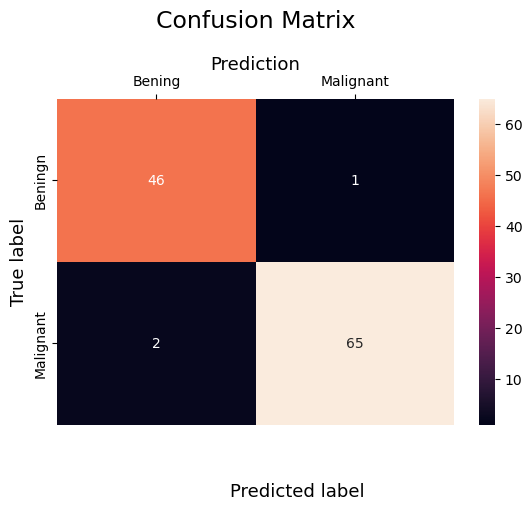

In [11]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Tensorflow model

In [127]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(30,)))  # Add the Input layer explicitly
    model.add(tf.keras.layers.Dense(50, activation='sigmoid'))    # hidden layer
    model.add(tf.keras.layers.Dense(2, activation='softmax'))    # output layer

    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [149]:
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=1, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def fit(self, X, y):
        self.model_ = self.build_fn()
        self.model_.fit(X, y, epochs=self.epochs, 
                        batch_size=self.batch_size, verbose=self.verbose)
        return self
    
    def predict(self, X):
        return np.argmax(self.model_.predict(X), axis=-1)
    
    def predict_probabilities(self, X):
        return self.model_.predict(X)
    
    def score(self, X, y):
        _, accuracy = self.model_.evaluate(X, y, verbose=self.verbose)
        return accuracy

In [150]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CustomKerasClassifier(build_fn=create_model, epochs=50, batch_size=10))
])

In [144]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_probabilities(X_test)

# Evauluate the Model
accuracy = pipeline.score(X_test, y_test)
print(f'test accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
test accuracy: 0.9649


In [151]:
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)

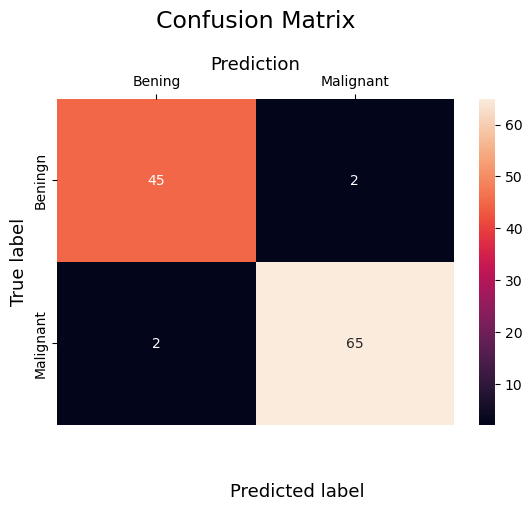

In [152]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()
